In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
import tensorflow as tf 
print(tf.__version__)

2.4.1


In [108]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Found GPU at: /device:GPU:0
Fri Mar 26 09:00:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    30W /  70W |  14079MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

In [109]:
pip install wget

In [110]:
import os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import shutil
import itertools
import requests
import json
import wget
from pathlib import Path
from PIL import Image
import random
import math
import glob
import re
import pandas as pd
import numpy as np
import scipy.io as sp
import tensorflow 
from sklearn.metrics import roc_curve 
from sklearn.metrics import confusion_matrix
#from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import warnings
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import imagenet_utils
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

## paths setting

In [111]:
os.getcwd()

'/content'

In [124]:

path_source = '/content/drive/MyDrive/datasets_gl/Images/'
path_destination = '/content/drive/MyDrive/datasets_gl/data_gl/'

In [113]:
os.makedirs('/content/drive/MyDrive/datasets_gl/data_gl/')

In [114]:
path_data = '/content/drive/MyDrive/datasets_gl/data_gl/'

In [ ]:
#Pour supprimer images
#!rm -R /content/drive/MyDrive/datasets/Images

In [115]:
# Changement de répertoire de travail
os.chdir(path_data)
os.makedirs('train/')
os.makedirs('valid/')
os.makedirs('test/')

In [116]:
os.listdir()

['train', 'valid', 'test']

In [118]:
path_datasets ='/content/drive/MyDrive/datasets_gl/'


In [122]:
import tarfile
tar = tarfile.open(path_datasets+'images.tar', 'r')
tar.extractall(path_datasets)
tar.close()


In [127]:
def downloadliens(response, dir_name) :
  if response.status_code == 200 :
    liens = response.json()['message']
    for lien in liens :
      wget.download(lien,path_source+"/"+dir_name)
      print('+', end='')
    return()

In [128]:
for file_breed in os.scandir(path_source) :
 if file_breed.is_dir():
   race_split = re.sub("n[0-9]*-", "", file_breed.name).split("_")
   print(race_split)
   if (len(race_split) == 1) :
     response = requests.get("https://dog.ceo/api/breed/"+race_split[0].lower()+"/images/random/10")
     downloadliens(response, file_breed.name)
   if (len(race_split) == 2) :
     response = requests.get("https://dog.ceo/api/breed/"+race_split[1].lower()+"/"+race_split[0].lower()+"/images/random/10")
     downloadliens(response, file_breed.name)

['Chihuahua']
++++++++++['Japanese', 'spaniel']
++++++++++['Maltese', 'dog']
['Pekinese']
++++++++++['Shih-Tzu']
['Blenheim', 'spaniel']
++++++++++['papillon']
++++++++++['toy', 'terrier']
++++++++++['Rhodesian', 'ridgeback']
++++++++++['Afghan', 'hound']
++++++++++['basset']
['beagle']
++++++++++['bloodhound']
['bluetick']
++++++++++['black-and-tan', 'coonhound']
['Walker', 'hound']
++++++++++['redbone']
++++++++++['borzoi']
++++++++++['Irish', 'wolfhound']
++++++++++['Italian', 'greyhound']
++++++++++['whippet']
++++++++++['Ibizan', 'hound']
++++++++++['Norwegian', 'elkhound']
++++++++++['Saluki']
++++++++++['Scottish', 'deerhound']
++++++++++['Weimaraner']
++++++++++['Staffordshire', 'bullterrier']
++++++++++['American', 'Staffordshire', 'terrier']
['Bedlington', 'terrier']
++++++++++['Border', 'terrier']
++++++++++['Kerry', 'blue', 'terrier']
['Irish', 'terrier']
++++++++++['Norfolk', 'terrier']
++++++++++['Norwich', 'terrier']
++++++++++['Yorkshire', 'terrier']
++++++++++['wire-ha

In [131]:
races_ = [re.sub("n[0-9]*-", "", file_breed.name) for file_breed in os.scandir(path_source) if file_breed.is_dir()]
races_

['Chihuahua',
 'Japanese_spaniel',
 'Maltese_dog',
 'Pekinese',
 'Shih-Tzu',
 'Blenheim_spaniel',
 'papillon',
 'toy_terrier',
 'Rhodesian_ridgeback',
 'Afghan_hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black-and-tan_coonhound',
 'Walker_hound',
 'redbone',
 'borzoi',
 'Irish_wolfhound',
 'Italian_greyhound',
 'whippet',
 'Ibizan_hound',
 'Norwegian_elkhound',
 'Saluki',
 'Scottish_deerhound',
 'Weimaraner',
 'Staffordshire_bullterrier',
 'American_Staffordshire_terrier',
 'Bedlington_terrier',
 'Border_terrier',
 'Kerry_blue_terrier',
 'Irish_terrier',
 'Norfolk_terrier',
 'Norwich_terrier',
 'Yorkshire_terrier',
 'wire-haired_fox_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Airedale',
 'cairn',
 'Australian_terrier',
 'Dandie_Dinmont',
 'Boston_bull',
 'miniature_schnauzer',
 'giant_schnauzer',
 'standard_schnauzer',
 'Scotch_terrier',
 'Tibetan_terrier',
 'silky_terrier',
 'soft-coated_wheaten_terrier',
 'West_Highland_white_terrier',
 'Lhasa',
 'flat-coate

In [130]:
len(races_)

120

In [132]:
#retourner le nombre d'images presentes dans le fichier images peu importe la race 
images = [filespath for filespath in glob.glob(path_source + "*/*")]

len(images)

21430

In [134]:
#EXECUTE ICI : GENERALISATION 
def moveImages (file_breed, path, percent) :
  file_breed_destination = path_destination+path+re.sub("n[0-9]*-","",file_breed.name)

  os.makedirs(file_breed_destination, exist_ok=True)

  file_breed_images = os.listdir(file_breed)

  for file in random.sample(file_breed_images, int(len(file_breed_images)*percent)):
    shutil.move(path_source+file_breed.name+"/"+file, file_breed_destination+"/"+re.sub("n[0-9]*_","",file))
  return()

In [135]:
#train , 70%
for file_breed in os.scandir(path_source):
  moveImages(file_breed, 'train/', 0.7)

In [136]:
#valid 20%%

for file_breed in os.scandir(path_source):
  moveImages(file_breed, 'valid/', 0.7)

In [137]:
#test 20%%

for file_breed in os.scandir(path_source):
  moveImages(file_breed, 'test/', 1)

In [138]:
path_train = path_destination +'/train'
os.listdir(path_train)
nb_train = os.listdir(path_train)

In [139]:
path_valid = path_destination +'/valid'
os.listdir(path_valid)
nb_valid = os.listdir(path_valid)

In [140]:
len(nb_valid)

120

In [141]:
len(nb_train)

120

# Data generation

In [142]:
#paths
path_test = path_destination +'test/'
path_test



'/content/drive/MyDrive/datasets_gl/data_gl/test/'

In [143]:
path_train = path_destination +'train/'
path_train



'/content/drive/MyDrive/datasets_gl/data_gl/train/'

In [144]:
path_valid = path_destination +'valid/'
path_valid

'/content/drive/MyDrive/datasets_gl/data_gl/valid/'

In [145]:
#scale entre 0 et 1
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [146]:
train_gen = train_datagen.flow_from_directory(
    path_train, # path du train 
    target_size=(150, 150), #image reshaping
    batch_size=20, 
    class_mode='categorical'
)

Found 14949 images belonging to 120 classes.


In [147]:
val_gen = val_datagen.flow_from_directory(
    path_valid, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical'
)

Found 4486 images belonging to 120 classes.


In [148]:
test_gen = test_datagen.flow_from_directory(
    path_test,
    target_size=(150,150),  
    batch_size=20,
    shuffle=False)
#shuffle : becasue later when we test our model , we want to have acces to unshuffled labels to plot our confusion matrix , by defaut
#defaullt, shuffle is set to True 

Found 1995 images belonging to 120 classes.


In [149]:
#execute si tu utilise l'api

def dataset_test (image_size,batch_size):
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
    test_gen = test_datagen.flow_from_directory(
    path_test,
    target_size=image_size,  # All images will be resized to image_size of images from API
    batch_size=batch_size,
    shuffle=False)

    return (test_gen)

In [150]:
type(val_gen)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [151]:
#mes feature a predire

nb_train = train_gen.num_classes
nb_class= nb_train 
nb_class

120

# CNN 

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [152]:
def diagnostic_learning_curves(history):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get number of epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (20, 10))
    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

### Model_1 : from scratch

In [153]:
inputs = tf.keras.layers.Input(shape=(150, 150, 3))
tf.keras.layers.Conv2D
#16 neuronnes d'activation  et un flitre de (3,3) on peut aussir ecrire 3 simplement
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(120, activation='sigmoid')(x)

model_1 = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model_1.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0   

RMSprop : https://keras.io/api/optimizers/rmsprop/

In [154]:
from tensorflow.keras.optimizers import RMSprop
model_1.compile (loss='categorical_crossentropy',
               optimizer = RMSprop(lr=0.001) ,metrics=['accuracy'])

In [156]:
#dataset_train = steps_per_epoch*epochs = 100*15= 15000
print("Fit model on training data : ")
history_1= model_1.fit(
     train_gen, epochs= 5,
    steps_per_epoch = len(train_gen),
    validation_data = val_gen,
    validation_steps = len(val_gen),
    verbose = 2)

#verbose=2 , je commente ceci dans un premier temps
#ensuite  essaye epochs = 5

Fit model on training data : 
Epoch 1/5
748/748 - 83s - loss: 4.5330 - accuracy: 0.0331 - val_loss: 4.2772 - val_accuracy: 0.0600
Epoch 2/5
748/748 - 81s - loss: 3.8657 - accuracy: 0.1359 - val_loss: 4.1011 - val_accuracy: 0.0999
Epoch 3/5
748/748 - 80s - loss: 2.5809 - accuracy: 0.3843 - val_loss: 4.6339 - val_accuracy: 0.1226
Epoch 4/5
748/748 - 80s - loss: 0.9662 - accuracy: 0.7522 - val_loss: 6.7195 - val_accuracy: 0.1387
Epoch 5/5
748/748 - 80s - loss: 0.2596 - accuracy: 0.9346 - val_loss: 10.0942 - val_accuracy: 0.1282


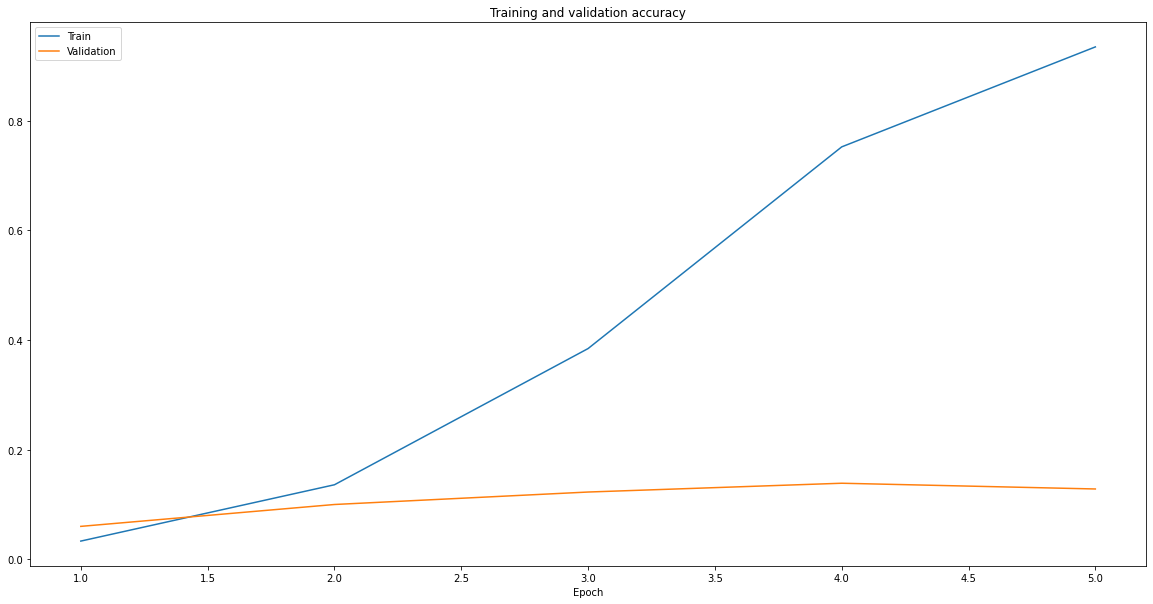

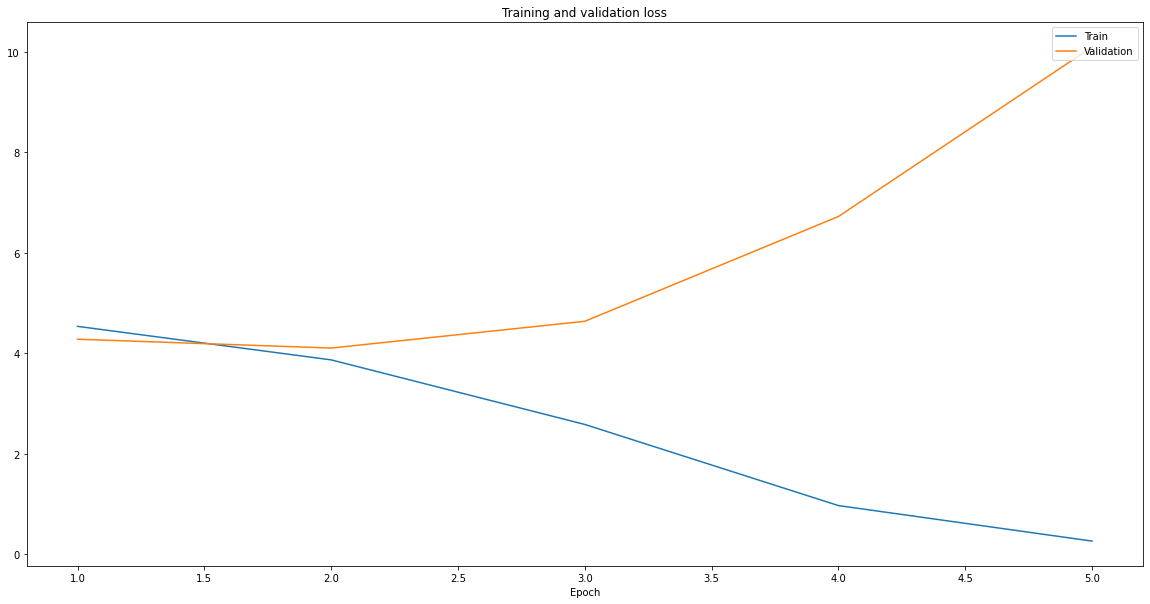

In [157]:
diagnostic_learning_curves(history_1)

#ajustement du dataset  TEST (de l'API,) 

In [158]:

def test_set (image_size,batch_size):
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

    test_gen = test_datagen.flow_from_directory(
    path_test,
    target_size=image_size,  # All images  from the API will be resized to image_size
    batch_size=batch_size,
    shuffle=False)

    return (test_gen)


#fonction pour les metriques 

In [160]:
test_labels = test_gen.classes
nb_class = test_gen.num_classes

In [161]:
#print les resultats de l'inference sur le model tuned
def inference (model,test_gen):
  
  test_labels = test_gen.classes
  nb_class = test_gen.num_classes
  
  predictions = model.predict (x=test_gen,steps=len(test_gen),verbose=0)
  cm = confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))

  #Récupération des class labels 
  name_labels = []
  for k,v in test_gen.class_indices.items():
    name_labels.append(k)

  #True Positive et False Positive par classes
  TP_FP = np.sum(cm,axis=0)

  #True Positive by classes
  TP = np.zeros(nb_class)
  for i in range (nb_class):
    TP[i] = (cm[i,i])

  #Accuracy per class
  accuracy =(TP/TP_FP*100).round()

  print ("Total True Positives for all classes :",TP.sum() )
  print ("Total predictions for all classes :",TP_FP.sum() )
  print ('Accuracy of predictions for all classes :',(TP.sum()/TP_FP.sum()*100).round(1))
  print ("accuracy.mean ",accuracy.mean().round(1))
  print ("accuracy.min",accuracy.min().round(1))
  print ("accuracy.max",accuracy.max().round(1))
  print ("accuracy.std",accuracy.std().round(1))

  acc_df = pd.DataFrame(accuracy.reshape(1,nb_class),columns=name_labels).transpose()
  acc_df.columns=["Accuracy"]

  acc_df.loc["Total True Positives for all classes"] = [TP.sum()]
  acc_df.loc["Total predictions for all classes"] = [TP_FP.sum()]
  acc_df.loc["Accuracy of predictions for all classes"] = [(TP.sum()/TP_FP.sum()*100).round(1)]
  acc_df.loc["accuracy.mean"] = [accuracy.mean().round(1)]
  acc_df.loc["accuracy.min"] = [accuracy.min().round(1)]
  acc_df.loc["accuracy.max"] = [accuracy.max().round(1)]
  acc_df.loc["accuracy.std"] = [accuracy.std().round(1)]
  
  return (acc_df)

In [162]:
inference_ = inference (model_1,test_gen)

Total True Positives for all classes : 44.0
Total predictions for all classes : 1995
Accuracy of predictions for all classes : 2.2
accuracy.mean  nan
accuracy.min nan
accuracy.max nan
accuracy.std nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [163]:
inference_.tail(10) 

Accuracy
vizsla                                        0.0
whippet                                       NaN
wire-haired_fox_terrier                       0.0
Total True Positives for all classes         44.0
Total predictions for all classes          1995.0
Accuracy of predictions for all classes       2.2
accuracy.mean                                 NaN
accuracy.min                                  NaN
accuracy.max                                  NaN
accuracy.std                                  NaN

# metrics

In [165]:
#The returned "history" object holds a record of the loss values and metric values during training:
history_1.history

{'accuracy': [0.03311258181929588,
  0.13586193323135376,
  0.3843066394329071,
  0.7522242069244385,
  0.9345775842666626],
 'loss': [4.5329909324646,
  3.8656678199768066,
  2.5809412002563477,
  0.9661973714828491,
  0.2596033811569214],
 'val_accuracy': [0.05996433272957802,
  0.09986624866724014,
  0.1226036548614502,
  0.13865359127521515,
  0.12817655503749847],
 'val_loss': [4.277233123779297,
  4.101132869720459,
  4.633868217468262,
  6.719520568847656,
  10.094167709350586]}

In [166]:
history_1_df=pd.DataFrame(history_1.history)
history_1_df

loss  accuracy   val_loss  val_accuracy
0  4.532991  0.033113   4.277233      0.059964
1  3.865668  0.135862   4.101133      0.099866
2  2.580941  0.384307   4.633868      0.122604
3  0.966197  0.752224   6.719521      0.138654
4  0.259603  0.934578  10.094168      0.128177

In [167]:
inference_.to_csv(path_datasets+'/dogsAccuracy-Model_1_gl.csv')
history_1_df.to_csv(path_datasets+'/lossacc-Model_1_gl.csv')

## Use the model for inference

In [168]:
#plot the confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [169]:
#making predictions
#predictions = model.predict (x=test_batches,verbose=0)
predictions = model_1.predict (x=test_gen, steps=len(test_gen),verbose=0)

In [170]:
test_labels = test_gen.classes
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

  

In [171]:
test_gen.class_indices

{'Afghan_hound': 0,
 'African_hunting_dog': 1,
 'Airedale': 2,
 'American_Staffordshire_terrier': 3,
 'Appenzeller': 4,
 'Australian_terrier': 5,
 'Bedlington_terrier': 6,
 'Bernese_mountain_dog': 7,
 'Blenheim_spaniel': 8,
 'Border_collie': 9,
 'Border_terrier': 10,
 'Boston_bull': 11,
 'Bouvier_des_Flandres': 12,
 'Brabancon_griffon': 13,
 'Brittany_spaniel': 14,
 'Cardigan': 15,
 'Chesapeake_Bay_retriever': 16,
 'Chihuahua': 17,
 'Dandie_Dinmont': 18,
 'Doberman': 19,
 'English_foxhound': 20,
 'English_setter': 21,
 'English_springer': 22,
 'EntleBucher': 23,
 'Eskimo_dog': 24,
 'French_bulldog': 25,
 'German_shepherd': 26,
 'German_short-haired_pointer': 27,
 'Gordon_setter': 28,
 'Great_Dane': 29,
 'Great_Pyrenees': 30,
 'Greater_Swiss_Mountain_dog': 31,
 'Ibizan_hound': 32,
 'Irish_setter': 33,
 'Irish_terrier': 34,
 'Irish_water_spaniel': 35,
 'Irish_wolfhound': 36,
 'Italian_greyhound': 37,
 'Japanese_spaniel': 38,
 'Kerry_blue_terrier': 39,
 'Labrador_retriever': 40,
 'Lakelan

In [172]:
cm_plot_labels = [races_] 
plot_confusion_matrix (cm, classes= [races_]  , title ='confusion matrix')

Confusion matrix, without normalization
[[21  0  0 ...  0  0  0]
 [14  0  0 ...  0  0  0]
 [17  0  1 ...  0  0  0]
 ...
 [13  0  0 ...  0  0  0]
 [15  1  0 ...  0  0  0]
 [13  0  0 ...  0  0  0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


# model regulation 
dropout layer

data augmentation 

In [173]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        path_train,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        path_valid,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 14949 images belonging to 120 classes.
Found 4486 images belonging to 120 classes.


#Model_2 : dropout(0.5)

In [174]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Activation
#dropout
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a 120 (classes) node and softmax activation 
output = layers.Dense(120, activation='softmax')(x)

# Configure and compile the model
model_2 = Model(img_input, output)

model_2.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0   

In [175]:
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [176]:
history_2 = model_2.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=5,
      validation_data=validation_generator,
      validation_steps=len(validation_generator),
      verbose=2)
#try with verbose =2

Epoch 1/5
748/748 - 145s - loss: 4.7478 - accuracy: 0.0135 - val_loss: 4.5964 - val_accuracy: 0.0218
Epoch 2/5
748/748 - 150s - loss: 4.5779 - accuracy: 0.0287 - val_loss: 4.3957 - val_accuracy: 0.0403
Epoch 3/5
748/748 - 142s - loss: 4.4619 - accuracy: 0.0381 - val_loss: 4.2964 - val_accuracy: 0.0506
Epoch 4/5
748/748 - 142s - loss: 4.3951 - accuracy: 0.0444 - val_loss: 4.2678 - val_accuracy: 0.0526
Epoch 5/5
748/748 - 142s - loss: 4.3361 - accuracy: 0.0493 - val_loss: 4.2079 - val_accuracy: 0.0655


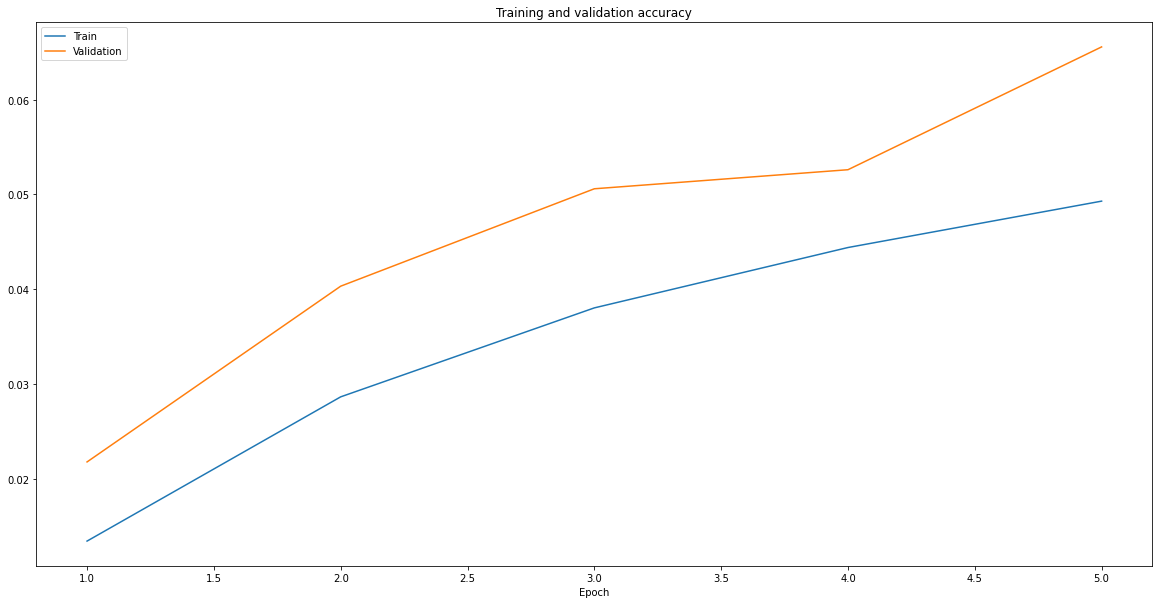

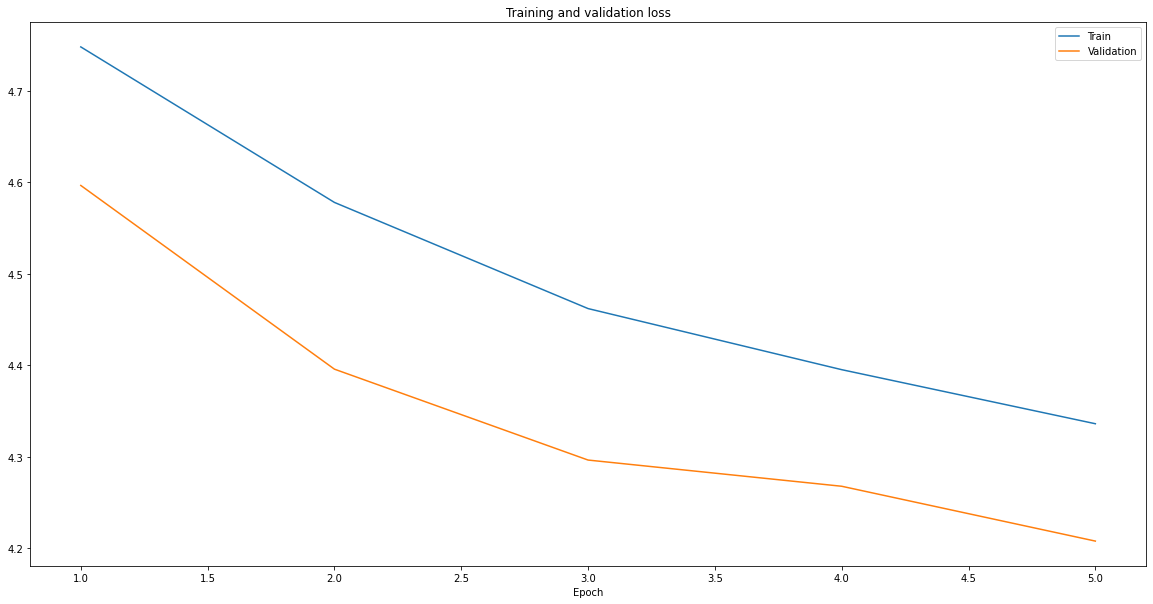

In [177]:
diagnostic_learning_curves(history_2)

#predictions 

In [178]:
test_labels = test_gen.classes
nb_class = test_gen.num_classes

In [181]:
#fonction pour les metrics
def inference (model,test_gen):
  test_labels = test_gen.classes

  predictions = model.predict (x=test_gen,steps=len(test_gen),verbose=0)
  cm = confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))

  nb_class = len(cm)


  #Récupération des class labels 
  name_labels = []
  for k,v in test_gen.class_indices.items():
    name_labels.append(k)

  #True Positive et False Positive par classes
  TP_FP = np.sum(cm,axis=0)

  #True Positive by classes
  TP = np.zeros(len(cm))
  for i in range (len(cm)):
    TP[i] = (cm[i,i])

  #Accuracy per class
  accuracy =(TP/TP_FP*100).round()

  print ("Total True Positives for all classes :",TP.sum() )
  print ("Total predictions for all classes :",TP_FP.sum() )
  print ('Accuracy of predictions for all classes :',(TP.sum()/TP_FP.sum()*100).round(1))
  print ("accuracy.mean ",accuracy.mean().round(1))
  print ("accuracy.min",accuracy.min().round(1))
  print ("accuracy.max",accuracy.max().round(1))
  print ("accuracy.std",accuracy.std().round(1))

  acc_df = pd.DataFrame(accuracy.reshape(1,nb_class),columns=name_labels).transpose()
  acc_df.columns=["Accuracy"]

  acc_df.loc["Total True Positives for all classes"] = [TP.sum()]
  acc_df.loc["Total predictions for all classes"] = [TP_FP.sum()]
  acc_df.loc["Accuracy of predictions for all classes"] = [(TP.sum()/TP_FP.sum()*100).round(1)]
  acc_df.loc["accuracy.mean"] = [accuracy.mean().round(1)]
  acc_df.loc["accuracy.min"] = [accuracy.min().round(1)]
  acc_df.loc["accuracy.max"] = [accuracy.max().round(1)]
  acc_df.loc["accuracy.std"] = [accuracy.std().round(1)]
  
  return (acc_df)

#metrics

In [182]:
inference_2 = inference (model_2,test_gen)

Total True Positives for all classes : 131.0
Total predictions for all classes : 1995
Accuracy of predictions for all classes : 6.6
accuracy.mean  nan
accuracy.min nan
accuracy.max nan
accuracy.std nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [183]:
inference_2.tail(10) 

Accuracy
vizsla                                       20.0
whippet                                       9.0
wire-haired_fox_terrier                       NaN
Total True Positives for all classes        131.0
Total predictions for all classes          1995.0
Accuracy of predictions for all classes       6.6
accuracy.mean                                 NaN
accuracy.min                                  NaN
accuracy.max                                  NaN
accuracy.std                                  NaN

In [184]:
#The returned "history" object holds a record of the loss values and metric values during training:
history_2.history

{'accuracy': [0.013512609526515007,
  0.028697572648525238,
  0.038062747567892075,
  0.04441768676042557,
  0.04930095747113228],
 'loss': [4.747751712799072,
  4.577855110168457,
  4.461884498596191,
  4.395137310028076,
  4.336080074310303],
 'val_accuracy': [0.021845743060112,
  0.04034774750471115,
  0.05060187354683876,
  0.05260811373591423,
  0.065537229180336],
 'val_loss': [4.596391677856445,
  4.395695686340332,
  4.296399116516113,
  4.267767906188965,
  4.207867622375488]}

In [185]:
history_2_df=pd.DataFrame(history_2.history)
history_2_df

loss  accuracy  val_loss  val_accuracy
0  4.747752  0.013513  4.596392      0.021846
1  4.577855  0.028698  4.395696      0.040348
2  4.461884  0.038063  4.296399      0.050602
3  4.395137  0.044418  4.267768      0.052608
4  4.336080  0.049301  4.207868      0.065537

In [186]:
inference_2.to_csv(path_datasets+'/dogsAccuracy-Model_2_gl.csv')
history_2_df.to_csv(path_datasets+'/lossacc-Model_2_gl.csv')

In [188]:

test_labels = test_gen.classes
nb_class = test_gen.num_classes
  
predictions = model_2.predict (x=test_gen,steps=len(test_gen),verbose=0)


In [189]:
cm = confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))

In [190]:
#creating labels of our confusion matrix
test_gen.class_indices

{'Afghan_hound': 0,
 'African_hunting_dog': 1,
 'Airedale': 2,
 'American_Staffordshire_terrier': 3,
 'Appenzeller': 4,
 'Australian_terrier': 5,
 'Bedlington_terrier': 6,
 'Bernese_mountain_dog': 7,
 'Blenheim_spaniel': 8,
 'Border_collie': 9,
 'Border_terrier': 10,
 'Boston_bull': 11,
 'Bouvier_des_Flandres': 12,
 'Brabancon_griffon': 13,
 'Brittany_spaniel': 14,
 'Cardigan': 15,
 'Chesapeake_Bay_retriever': 16,
 'Chihuahua': 17,
 'Dandie_Dinmont': 18,
 'Doberman': 19,
 'English_foxhound': 20,
 'English_setter': 21,
 'English_springer': 22,
 'EntleBucher': 23,
 'Eskimo_dog': 24,
 'French_bulldog': 25,
 'German_shepherd': 26,
 'German_short-haired_pointer': 27,
 'Gordon_setter': 28,
 'Great_Dane': 29,
 'Great_Pyrenees': 30,
 'Greater_Swiss_Mountain_dog': 31,
 'Ibizan_hound': 32,
 'Irish_setter': 33,
 'Irish_terrier': 34,
 'Irish_water_spaniel': 35,
 'Irish_wolfhound': 36,
 'Italian_greyhound': 37,
 'Japanese_spaniel': 38,
 'Kerry_blue_terrier': 39,
 'Labrador_retriever': 40,
 'Lakelan

In [191]:
cm_plot_labels= [test_gen.class_indices]
plot_confusion_matrix (cm=cm , classes= cm_plot_labels, normalize=False, title='confusion matrix')

Confusion matrix, without normalization
[[2 0 0 ... 0 0 0]
 [2 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [2 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


# Model_3
# finetuning : transfert learning with MobileNet

definir les batches train, test, valid, from mobileNet, voir le premier tuto : Process Images for Fine-Tuned MobileNet with TensorFlow's Keras API

faire l'inference de mmodlee 1 et modele 2, j'execute les models avant pour gagner en temps, piusque colab saute 

In [192]:
#resize data to 224
#batches:train_batch and val_batch, test_batch
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=path_train,target_size=(224,224), batch_size=20)

val_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=path_valid,target_size=(224,224), batch_size=20)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=path_test,target_size=(224,224), batch_size=20, shuffle = False )

Found 14949 images belonging to 120 classes.
Found 4486 images belonging to 120 classes.
Found 1995 images belonging to 120 classes.


In [193]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [194]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [195]:
#we're going to grab the output from the sixth to last layer of the model and store it in this variable x. 
x = mobile.layers[-6].output

In [196]:
#units=nb_class=120
output = Dense(units=120, activation='softmax')(x)

In [198]:
# we construct the new fine-tuned model, which we're calling model3, !!!!change de nom 

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Activation


model3= Model (inputs=mobile.input,outputs=output)

In [199]:
#I did a little experimenting and found that training the last 23 layers will give us a pretty decently performing model
for layer in model3.layers[:-23]: 
    layer.trainable = False

In [200]:
model3.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [201]:
def get_model():
  #create the model 
  x = mobile.layers[-6].output
  output = Dense(units=120, activation='softmax')(x)
  model3= Model (inputs=mobile.input,outputs=output)
  #model3.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model3
  

In [202]:
model3= get_model()

In [203]:
model3.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
history3=model3.fit(x=train_datagen,
            steps_per_epoch=len(train_datagen),#
            validation_data=val_datagen,
            validation_steps=len(val_datagen),#batch_size
            epochs=5,
            verbose=2)

Epoch 1/5
748/748 - 3596s - loss: 2.3678 - accuracy: 0.4539 - val_loss: 1.2409 - val_accuracy: 0.6750
Epoch 2/5
748/748 - 95s - loss: 0.9566 - accuracy: 0.7619 - val_loss: 0.9591 - val_accuracy: 0.7385
Epoch 3/5
748/748 - 95s - loss: 0.6174 - accuracy: 0.8595 - val_loss: 0.8730 - val_accuracy: 0.7548
Epoch 4/5
748/748 - 94s - loss: 0.4131 - accuracy: 0.9227 - val_loss: 0.8216 - val_accuracy: 0.7615
Epoch 5/5
748/748 - 94s - loss: 0.2729 - accuracy: 0.9597 - val_loss: 0.7787 - val_accuracy: 0.7648


In [42]:

# Calling `save('my_model')` creates a SavedModel folder `my_model`where my model is loadede 
#cet appel cree un dossier my_model contenant : (faire ls my_model)assest saved_model.pb variables 
#saved_model.pb contient l'optimisateur , la loss, les metriques 
#variables  contient les poids  .
model3.save("my_model3")

INFO:tensorflow:Assets written to: my_model3/assets


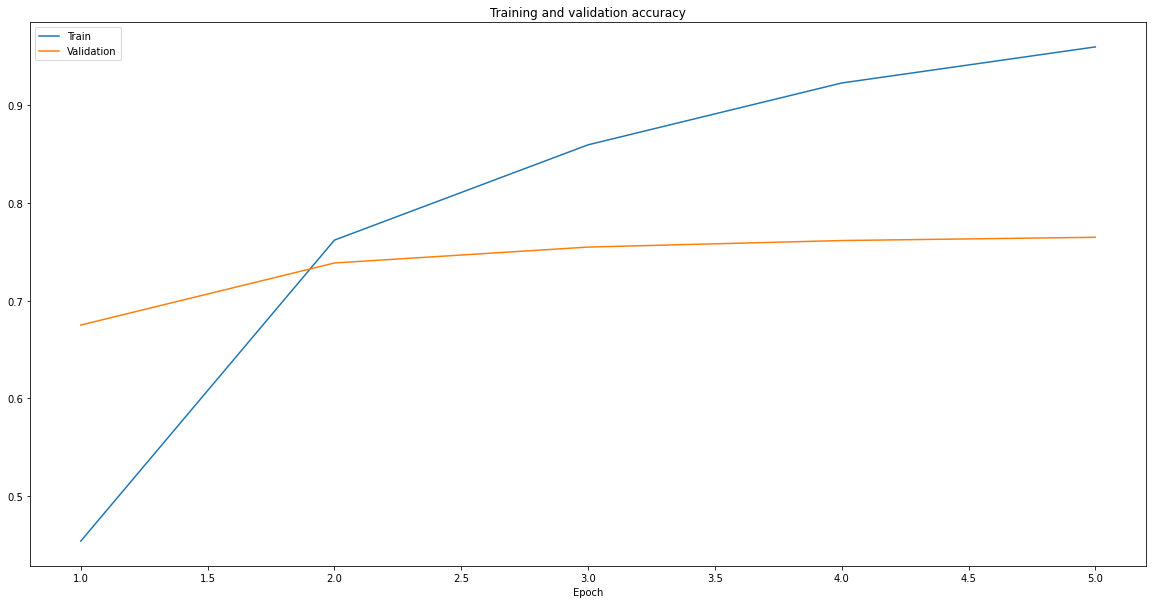

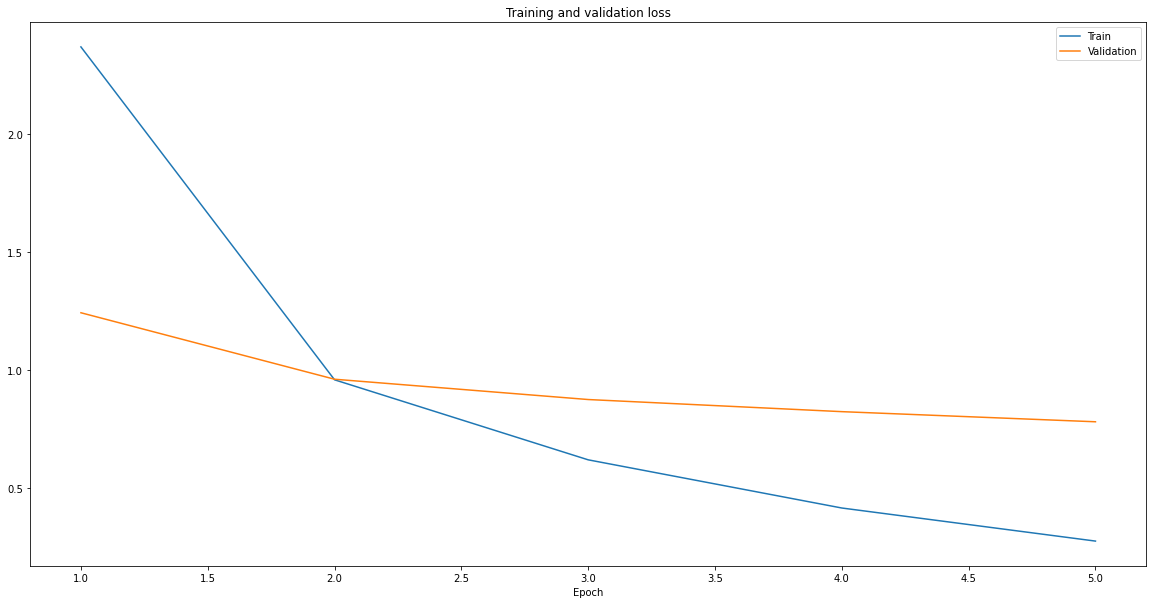

In [45]:
diagnostic_learning_curves(history3)

### faire l'inference avant 

In [205]:

def test_set (image_size,batch_size):
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

    test_gen = test_datagen.flow_from_directory(
    path_test,
    target_size=image_size,  # All images  from the API will be resized to image_size
    batch_size=batch_size,
    shuffle=False)

    return (test_gen)

In [206]:
inference3 = inference (model3, test_set(image_size=(224,224),batch_size=20))

Found 1995 images belonging to 120 classes.
Total True Positives for all classes : 16.0
Total predictions for all classes : 1995
Accuracy of predictions for all classes : 0.8
accuracy.mean  nan
accuracy.min nan
accuracy.max nan
accuracy.std nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [208]:
#erreur parce model 3 déjà sauvegardé
history3.to_csv(path_source + '/lossacc-model3_gl.csv')
inference3.to_excel(path_source + '/dogsAccuracy-model3_gl.xlsx')

NameError: ignored

In [209]:
predictions=model3.predict(x=test_gen, steps=len(test_gen), verbose =0)
cm =confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [210]:
test_gen.class_indices

{'Afghan_hound': 0,
 'African_hunting_dog': 1,
 'Airedale': 2,
 'American_Staffordshire_terrier': 3,
 'Appenzeller': 4,
 'Australian_terrier': 5,
 'Bedlington_terrier': 6,
 'Bernese_mountain_dog': 7,
 'Blenheim_spaniel': 8,
 'Border_collie': 9,
 'Border_terrier': 10,
 'Boston_bull': 11,
 'Bouvier_des_Flandres': 12,
 'Brabancon_griffon': 13,
 'Brittany_spaniel': 14,
 'Cardigan': 15,
 'Chesapeake_Bay_retriever': 16,
 'Chihuahua': 17,
 'Dandie_Dinmont': 18,
 'Doberman': 19,
 'English_foxhound': 20,
 'English_setter': 21,
 'English_springer': 22,
 'EntleBucher': 23,
 'Eskimo_dog': 24,
 'French_bulldog': 25,
 'German_shepherd': 26,
 'German_short-haired_pointer': 27,
 'Gordon_setter': 28,
 'Great_Dane': 29,
 'Great_Pyrenees': 30,
 'Greater_Swiss_Mountain_dog': 31,
 'Ibizan_hound': 32,
 'Irish_setter': 33,
 'Irish_terrier': 34,
 'Irish_water_spaniel': 35,
 'Irish_wolfhound': 36,
 'Italian_greyhound': 37,
 'Japanese_spaniel': 38,
 'Kerry_blue_terrier': 39,
 'Labrador_retriever': 40,
 'Lakelan

In [211]:
cm_plot_labels = [test_gen.class_indices]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, normalize=False, title='confusion matrix')

Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


In [212]:
plot_confusion_matrix(cm=cm, classes=[races_], normalize=False, title='confusion matrix')

Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


## predict an image with ImageNet 

In [244]:
def process_imgs (file, target_size = (224, 224)):
  img_path = path_datasets +'/data_gl/samples' 
  img = image.load_img(img_path + file , target_size)
  if img.mode !="RGB":
     img = img.convert("RGB")
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [214]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

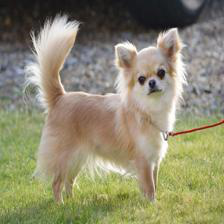

In [238]:
chien_test1_tf = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/datasets_gl/data_gl/samples/chien_test1.jpg')
chien_test1_tf

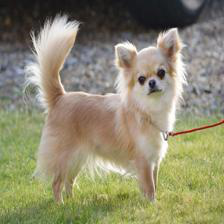

In [239]:
chien_test1 = chien_test1_tf.resize((224, 224))
chien_test1

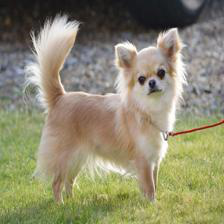

In [241]:
chien_test1.save("/content/drive/MyDrive/datasets_gl/data_gl/samples/chien_test1.jpg")
chien_test1

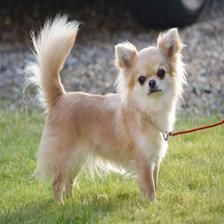

In [242]:
#try an image 
#cree ton dossier sample images 
from IPython.display import Image #cree le path des images sample
Image(filename='/content/drive/MyDrive/datasets_gl/data_gl/samples/chien_test1.jpg', width=300,height=200) #set witdth and height

In [245]:
processed_image = process_imgs('/chien_test1.jpg')
predictions = model3.predict(processed_image).T

In [ ]:
results = imagenet_utils.decode_predictions(predictions)
#reecrire le resultat ici avec cette fn

In [247]:
predictions.shape

(120, 1)

In [248]:
predictions

array([[9.89110395e-03],
       [2.67150756e-02],
       [5.96516021e-03],
       [2.12014094e-03],
       [5.95162297e-03],
       [3.04166786e-03],
       [1.06406361e-02],
       [1.28808815e-03],
       [6.50009885e-03],
       [2.54342170e-03],
       [2.19600904e-03],
       [4.73460136e-03],
       [2.15706285e-02],
       [2.34699785e-03],
       [1.41558819e-03],
       [1.76859461e-03],
       [1.13813765e-02],
       [1.12150265e-02],
       [3.20502254e-03],
       [1.01627386e-03],
       [3.47100478e-03],
       [1.96474306e-02],
       [5.46806632e-03],
       [6.01160992e-03],
       [1.13658258e-03],
       [1.58009920e-04],
       [8.17757659e-03],
       [4.69631935e-03],
       [6.52401000e-02],
       [8.98159109e-04],
       [3.25866905e-03],
       [5.54101355e-03],
       [3.36180860e-03],
       [3.58833978e-03],
       [5.45831490e-03],
       [2.41490387e-04],
       [2.16188654e-03],
       [1.51525799e-03],
       [2.63503217e-03],
       [6.25341106e-03],


In [249]:
prediction = np.argmax(predictions[0])
pred3 = np.argsort(predictions)

In [250]:
pred3_df = pd.DataFrame(predictions)

In [251]:
pred3_df['labels']= races_

In [252]:
##
pred3_df['labels']= races_
pred3_df.columns = ['Proba','labels']

In [253]:
pred3_df.sort_values('Proba',ascending= False).head(10)

Proba              labels
28   0.065240  Bedlington_terrier
91   0.049291          Great_Dane
90   0.046789     Tibetan_mastiff
63   0.039246             clumber
58   0.031934              vizsla
74   0.030034              kelpie
1    0.026715    Japanese_spaniel
107  0.025654            Pembroke
118  0.022923   Shetland_sheepdog
60   0.022804        Irish_setter

source fn : prepare image :
https://stackoverflow.com/questions/50906123/nameerror-name-image-is-not-defined/50906222

In [255]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

processed_image = process_imgs('/chien_test1.jpg')

In [257]:
predictions = model3.predict(processed_image)

In [258]:
predictions.shape

(1, 120)

In [259]:
predictions

array([[9.89110395e-03, 2.67150756e-02, 5.96516021e-03, 2.12014094e-03,
        5.95162297e-03, 3.04166786e-03, 1.06406361e-02, 1.28808815e-03,
        6.50009885e-03, 2.54342170e-03, 2.19600904e-03, 4.73460136e-03,
        2.15706285e-02, 2.34699785e-03, 1.41558819e-03, 1.76859461e-03,
        1.13813765e-02, 1.12150265e-02, 3.20502254e-03, 1.01627386e-03,
        3.47100478e-03, 1.96474306e-02, 5.46806632e-03, 6.01160992e-03,
        1.13658258e-03, 1.58009920e-04, 8.17757659e-03, 4.69631935e-03,
        6.52401000e-02, 8.98159109e-04, 3.25866905e-03, 5.54101355e-03,
        3.36180860e-03, 3.58833978e-03, 5.45831490e-03, 2.41490387e-04,
        2.16188654e-03, 1.51525799e-03, 2.63503217e-03, 6.25341106e-03,
        1.58444128e-03, 3.69046791e-03, 7.11335940e-03, 2.03183549e-03,
        2.29664543e-03, 4.83938213e-03, 1.70635770e-03, 3.02441185e-03,
        7.88344070e-03, 1.08971947e-03, 2.04771552e-02, 8.89433722e-04,
        6.51825266e-03, 8.62740260e-03, 4.56210133e-03, 4.273531

In [260]:
#le model_3 est meilleure evaluons sa prediction


prediction = np.argmax(predictions[0])
pred3 = np.argsort(predictions)


In [263]:
pred3_df = pd.DataFrame(predictions).T


In [264]:
##
pred3_df['labels']= races_
pred3_df.columns = ['Proba','labels']

In [266]:
pred3_df.sort_values("Proba",ascending=False).head(10)

Proba              labels
28   0.065240  Bedlington_terrier
91   0.049291          Great_Dane
90   0.046789     Tibetan_mastiff
63   0.039246             clumber
58   0.031934              vizsla
74   0.030034              kelpie
1    0.026715    Japanese_spaniel
107  0.025654            Pembroke
118  0.022923   Shetland_sheepdog
60   0.022804        Irish_setter

In [267]:
pred3

array([[104,  25,  35,  68,  98,  51,  29,  59,  19,  49,  24, 105,  80,
          7, 103,  67,  14,  37,  56,  40,  86,  46,  15,  70,  43,  69,
         88,   3,  36,  10,  96,  44,  13,  93,   9,  38,  81,  47,   5,
         61, 100,  65,  72, 102,  18,  30, 115,  78,  66,  32,  99,  20,
        108,  33,  41,  57,  55,  54,  27,  11, 112,  45,  34,  22,  31,
        113,  76,   4,   2,  23,  62,  39, 114,  79,   8,  52, 106,  73,
         71,  42,  82,  95,  83,  48,  26,  53,  85, 119,  64,  94,   0,
         89,   6, 116,  17, 110, 111,  16,  92,  87,  97,  77, 101,  84,
        109, 117,  21,  75,  50,  12,  60, 118, 107,   1,  74,  58,  63,
         90,  91,  28]])

#use the model for inference 

In [269]:
#lire plot_confusion_matrix avant ceci
#predictions
predictions = model3.predict(x=test_gen, steps=len(test_gen), verbose=0)
#predictions = model3.predict(model3,test_set(image_size = (224,224),batch_size= 20))


In [270]:
#confusion matrix

cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [271]:
plot_confusion_matrix(cm, classes =[races_] )

Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


In [ ]:
#Erreur parce que model préalablement sauvegardé
history3_df=pd.DataFrame(history3.history)
history3_df

In [ ]:
#Erreur parce que model préalablement sauvegardé
history3_df.to_csv(path_source+'/lossacc-Model5.csv') 

inference3.to_excel(path_source+'/dogssAccuracy-Model5.xlsx')

# tranfert learning , VVG16, ResNet

---
https://learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/


---



#inference M6 : vgg16

MobileNet a plus de couche que VVG, EVALUONS vvg

In [ ]:
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=path_train, target_size=(224,224), class_mode='categorical', batch_size=20)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=path_valid, target_size=(224,224), class_mode='categorical', batch_size=20)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(
    directory=path_test,target_size=(224,224),class_mode='categorical',batch_size=20, shuffle = False )



Found 12307 images belonging to 120 classes.
Found 4111 images belonging to 120 classes.
Found 4162 images belonging to 120 classes.


In [ ]:
from  tensorflow.keras.applications.vgg16 import VGG16
from  tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
from  tensorflow.keras.applications.vgg16 import VGG16
vgg16_model= VGG16()


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model6 = Sequential([
Conv2D(filters=32 , kernel_size =(3,3)),

MaxPool2D(pool_size=(2,2),strides =2),
Conv2D(filters =64, kernel_size= (3,3), activation= 'relu', padding ='same'),
MaxPool2D(pool_size=(2,2),strides =2),
MaxPool2D(pool_size=(2,2),strides =2),
Flatten()
])
for layer in vgg16_model.layers[:-1]:
  #layer.trainable = False
    #model.add(layer)
    model6.add(layer)

In [ ]:

model6.add(Dense(units=120, activation='softmax'))

In [ ]:
model6.summary()

ValueError: ignored

In [ ]:
#lower lr because we are doing tranfert learning 

model6.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history6 = model6.fit(
    
)

In [ ]:
diagnostic_learning_curves(history6)

#Deploy in streamlit

In [1]:
!pip install -U ipykernel

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.7/dist-packages (5.5.0)


In [281]:
!pip install -q streamlit

In [282]:
!pip install pyngrok

In [283]:
!ngrok authtoken 1qFHKkcGetwfc7v3Ra9eUm0Gxzi_8a7kmsswKMjCUFcJskoft

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [284]:
%%writefile score_gl.py

import tensorflow as tf
import numpy as np
import streamlit as st
from PIL import Image
import requests
from io import BytesIO
import os
import re

st.set_option('deprecation.showfileUploaderEncoding', False)
st.title("Welcome to the Dogs breeds Classifier created by Doriane")
st.text("Provide URL of dogs Image for breeds classification")

@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/my_model3')#path vers le model
  return model

with st.spinner('Loading Model Into Memory....'):
  model = load_model()

classes = [re.sub("n[0-9]*-", "", file_breed.name) for file_breed in os.scandir("/content/drive/MyDrive/datasets/Images/") if file_breed.is_dir()]

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[224,224])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)

path = st.text_input('Enter Image URL to Classify.. ','http://barmac.com.au/wp-content/uploads/sites/3/2016/01/Angular-Leaf-Spot-Beans1.jpg')
if path is not None:
    content = requests.get(path).content

    st.write("Predicted Class :")
    with st.spinner('classifying.....'):
      label =np.argmax(model.predict(decode_img(content)),axis=1)
      st.write(classes[label[0]])    
    st.write("")
    image = Image.open(BytesIO(content))
    st.image(image, caption='Classifying dogs breed ', use_column_width=True)

Overwriting score_gl.py


In [285]:
!nohup streamlit run --server.port 80 score_gl.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok

url = ngrok.connect(port=8501)
url

In [ ]:
!cat nohup.out